In [11]:
%reload_ext autoreload
%autoreload 2

In [27]:
import function as func
from ellipsoid_mirror import *
from read_simulation import *
np.set_printoptions(threshold=20)

plt.rcParams['font.size'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

# General setting

In [13]:
freq = 215*GHz 
wavelength = calc_wavelength(freq)

# Setup calculation

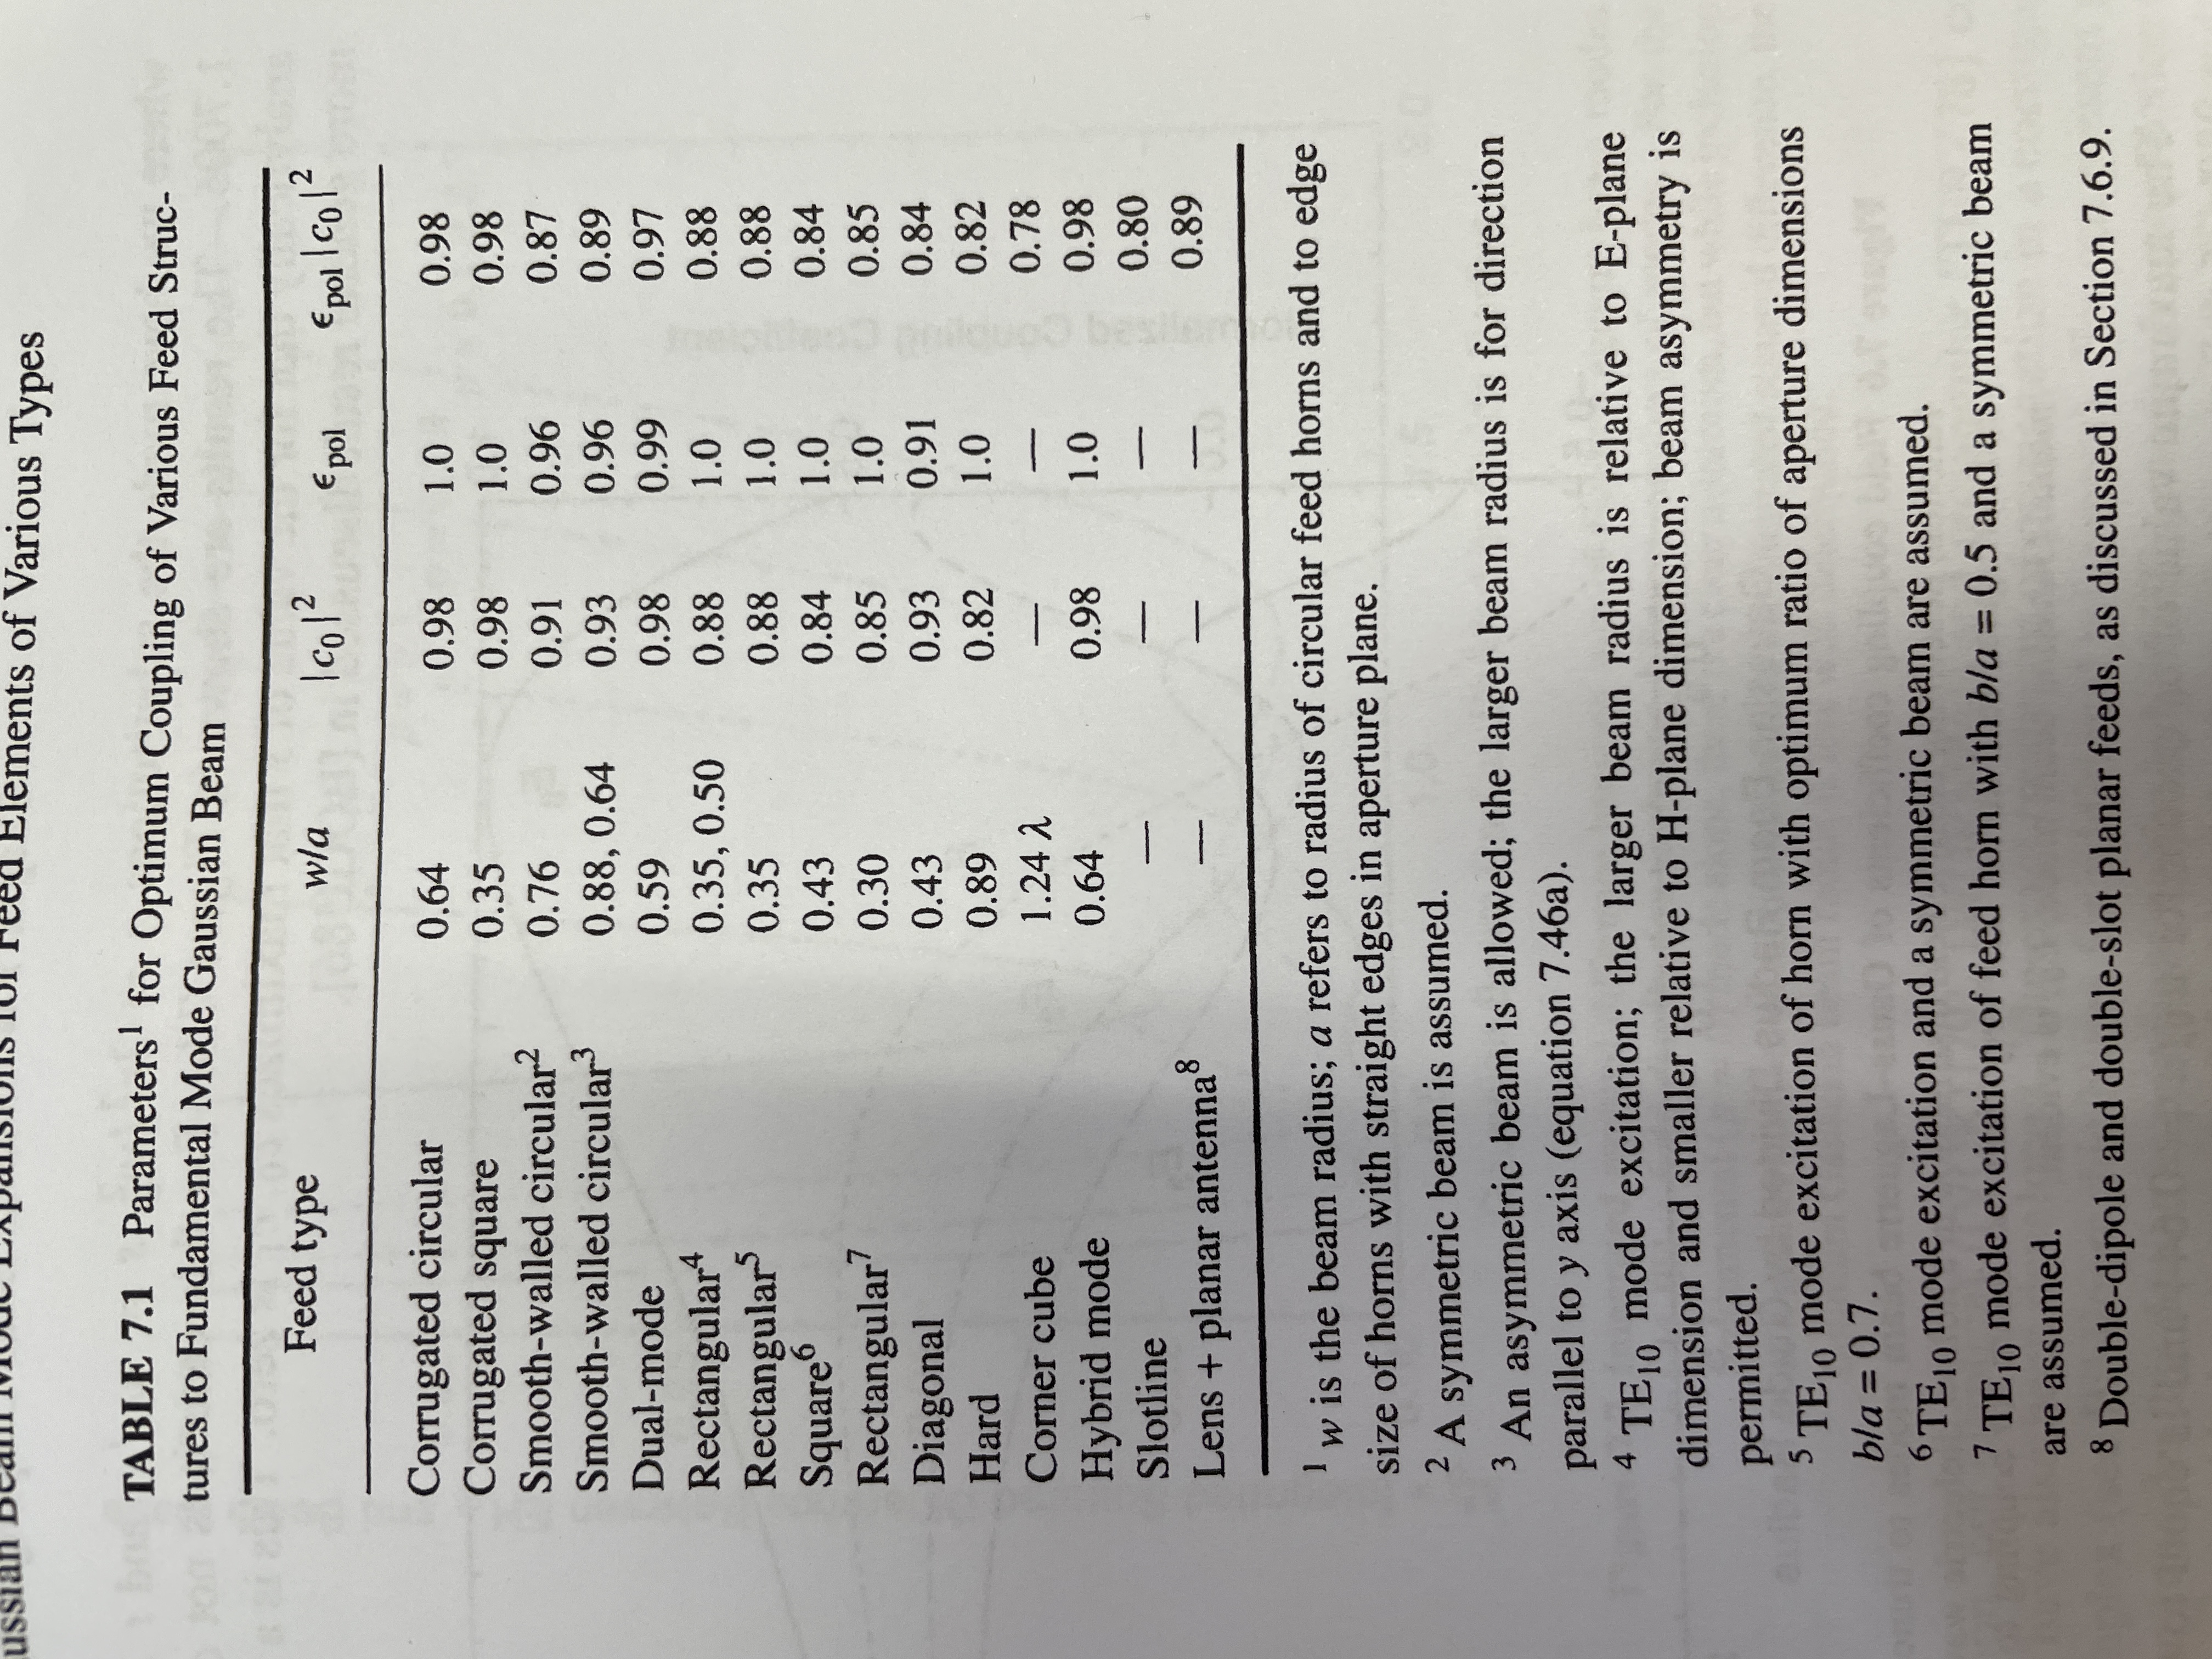

In [14]:
from IPython.display import Image
Image('Goldsmith_table7.1.JPG', width=400)

In [15]:
def calc_antenna_parameters(
    antenna_a,  # waveguid short edge (E-plane)
    antenna_b,  # waveguid long edge (H-plane)
    antenna_L,  # taper section length
    antenna_taper, # taper angle [rad]
    antenna_w_over_A = 0.50, # w/A at aperture in E-plane
    antenna_w_over_B = 0.35, # w/B at aperture in H-plane
    # from P. F. Goldsmith table 7.1 
    # rectangular^5: H-plane = 0.35
    #                           E-plane = 0.50
    verbose = 1,
    ):
    
    if antenna_w_over_B is None:
        antenna_w_over_B = antenna_w_over_A
        pass
    antenna_A = antenna_a + 2. * antenna_L * np.tan(antenna_taper)
    antenna_B = antenna_b + 2. * antenna_L * np.tan(antenna_taper)
    antenna_Ra = antenna_A/2. / np.sin(antenna_taper)
    antenna_Rb = antenna_B/2. / np.sin(antenna_taper)

    # Beam waist
    antenna_wA = antenna_w_over_A * antenna_A
    antenna_wB = antenna_w_over_B * antenna_B
    antenna_w0A = calc_beamwaist0(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_w0B = calc_beamwaist0(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_d0A = calc_waist_distance(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_d0B = calc_waist_distance(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_L0A = antenna_L - antenna_d0A
    antenna_L0B = antenna_L - antenna_d0B

    # Check
    if verbose > 0:
        print(f'a = {antenna_a/mm} mm')
        print(f'b = {antenna_b/mm} mm')
        print(f'A = {antenna_A/mm} mm')
        print(f'B = {antenna_B/mm} mm')
        print(f'Ra = {antenna_Ra/mm} mm')
        print(f'Rb = {antenna_Rb/mm} mm')
        print(f'A/B = {antenna_A/antenna_B}')
        print(f'w_A/A = {antenna_w_over_A}')
        print(f'w_B/B = {antenna_w_over_B}')
        print(f'beam waist in A = {antenna_w0A/mm} mm')
        print(f'beam waist distance from aperture in A = -{antenna_d0A/mm} mm')
        print(f'beam waist distance from antenna bottom in A = {antenna_L0A/mm} mm')
        print(f'beam waist in B = {antenna_w0B/mm} mm')
        print(f'beam waist distance from aperture in B = -{antenna_d0B/mm} mm')
        print(f'beam waist distance from antenna bottom in B = {antenna_L0B/mm} mm')
        print(f'antenna taper angle in A = {np.rad2deg( np.arcsin(antenna_A/2./antenna_Ra) )} deg')
        print(f'antenna taper angle in B = {np.rad2deg( np.arcsin(antenna_B/2./antenna_Rb) )} deg')
        pass
    
    antenna_pars = {
        'L': antenna_L,
        'taper':antenna_taper,
        'w_over_A': antenna_w_over_A, 
        'w_over_B': antenna_w_over_B, 
        
        'a': antenna_a, 
        'A': antenna_A, 
        'Ra': antenna_Ra, 
        'wA': antenna_wA, 
        'w0A': antenna_w0A, 
        'd0A': antenna_d0A, 
        'L0A': antenna_L0A, 
        
        'b': antenna_b, 
        'B': antenna_B, 
        'Rb': antenna_Rb, 
        'wB': antenna_wB, 
        'w0B': antenna_w0B, 
        'd0B': antenna_d0B, 
        'L0B': antenna_L0B, 
        }
    
    return antenna_pars


def calc_circular_antenna_parameters(
    antenna_r, # Radius in aperture
    antenna_L,  # taper section length
    antenna_taperA, # taper angle in E-plane
    antenna_taperB, # taper angle in H-plane
    antenna_w_over_A = 0.88, # w/A at aperture in E-plane
    antenna_w_over_B = 0.64, # w/B at aperture in H-plane
    # from P. F. Goldsmith table 7.1 
    # smooth-walled circular: E-plane = 0.88
    #                                          H-plane = 0.64
    verbose = 1,
    ):
    
    if antenna_w_over_B is None:
        antenna_w_over_B = antenna_w_over_A
        pass
    #antenna_A = antenna_R*2. # aperture diameter in E-plane
    #antenna_B = antenna_R*2. # aperture diameter in H-plane
    antenna_rA = antenna_r # aperture radius in E-plane
    antenna_rB = antenna_r # aperture radius in H-plane
    antenna_Ra = antenna_rA / np.sin(antenna_taperA) # curvature at antenna aperture in E-plane
    antenna_Rb = antenna_rB / np.sin(antenna_taperB) # curvature at antenna aperture in H-plane

    # Beam waist
    #antenna_wA = antenna_w_over_A * antenna_A
    #antenna_wB = antenna_w_over_B * antenna_B
    antenna_wA = antenna_w_over_A * antenna_rA
    antenna_wB = antenna_w_over_B * antenna_rB
    antenna_w0A = calc_beamwaist0(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_w0B = calc_beamwaist0(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_d0A = calc_waist_distance(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_d0B = calc_waist_distance(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_L0A = antenna_L - antenna_d0A
    antenna_L0B = antenna_L - antenna_d0B

    # Check
    if verbose > 0:
        print(f'rA = {antenna_rA/mm} mm')
        print(f'rB = {antenna_rB/mm} mm')
        print(f'Ra = {antenna_Ra/mm} mm')
        print(f'Rb = {antenna_Rb/mm} mm')
        print(f'w_A/A = {antenna_w_over_A}')
        print(f'w_B/B = {antenna_w_over_B}')
        print(f'beam waist in A = {antenna_w0A/mm} mm')
        print(f'beam waist distance from aperture in A = -{antenna_d0A/mm} mm')
        print(f'beam waist distance from antenna bottom in A = {antenna_L0A/mm} mm')
        print(f'beam waist in B = {antenna_w0B/mm} mm')
        print(f'beam waist distance from aperture in B = -{antenna_d0B/mm} mm')
        print(f'beam waist distance from antenna bottom in B = {antenna_L0B/mm} mm')
        print(f'antenna taper angle in A = {np.rad2deg( np.arcsin(antenna_r/antenna_Ra) )} deg')
        print(f'antenna taper angle in B = {np.rad2deg( np.arcsin(antenna_r/antenna_Rb) )} deg')
        pass
    
    antenna_pars = {
        'L': antenna_L,
        'taper':antenna_taper,
        'w_over_A': antenna_w_over_A, 
        'w_over_B': antenna_w_over_B, 
        
        'rA': antenna_rA, 
        'Ra': antenna_Ra, 
        'wA': antenna_wA, 
        'w0A': antenna_w0A, 
        'd0A': antenna_d0A, 
        'L0A': antenna_L0A, 
        
        'rB': antenna_rB, 
        'Rb': antenna_Rb, 
        'wB': antenna_wB, 
        'w0B': antenna_w0B, 
        'd0B': antenna_d0B, 
        'L0B': antenna_L0B, 
        }
    
    return antenna_pars

## Circuar Horn antenna

In [72]:
antenna_r0 = 0.6*mm
antenna_r1 = 5*mm
antenna_L = 70*mm
antenna_taper = np.arctan( (antenna_r1 - antenna_r0)/antenna_L )
print(f'taper = {np.rad2deg(antenna_taper)} deg')
antenna_pars = calc_circular_antenna_parameters(
    antenna_r=antenna_r1,
    antenna_taperA = antenna_taper, 
    antenna_taperB = antenna_taper, 
    antenna_L=antenna_L, 
    antenna_w_over_A = 0.88, # smooth-walled  circular E-plane
    antenna_w_over_B = 0.64, # smooth-walled circular H-plane
)

w0 = antenna_pars['w0A'] # beam waist in E-plane
w0H = antenna_pars['w0B'] # beam waist in H-plane
d_waist = antenna_pars['d0A'] # distance from waist to aperture
L_waist = antenna_pars['L0A'] # distance from antenna bottom to beam waist
d_waistH = antenna_pars['d0B'] # distance from waist to aperture
L_waistH = antenna_pars['L0B'] # distance from antenna bottom to beam waist
print(f'w0 = {w0/mm} mm')
print(f'd_waist = {d_waist/mm} mm')
print(f'L_waist = {L_waist/mm} mm')
print(f'w0 in H-plane = {w0H/mm} mm')
print(f'd_waist in H-plane = {d_waistH/mm} mm')
print(f'L_waist in H-plane = {L_waistH/mm} mm')

taper = 3.5967170776284667 deg
rA = 5.0 mm
rB = 5.0 mm
Ra = 79.70244248981943 mm
Rb = 79.70244248981943 mm
w_A/A = 0.88
w_B/B = 0.64
beam waist in A = 3.8597916056636232 mm
beam waist distance from aperture in A = -18.36947296749009 mm
beam waist distance from antenna bottom in A = 51.63052703250992 mm
beam waist in B = 3.07381283249564 mm
beam waist distance from aperture in B = -6.161953605361194 mm
beam waist distance from antenna bottom in B = 63.838046394638816 mm
antenna taper angle in A = 3.5967170776284667 deg
antenna taper angle in B = 3.5967170776284667 deg
w0 = 3.8597916056636232 mm
d_waist = 18.36947296749009 mm
L_waist = 51.63052703250992 mm
w0 in H-plane = 3.07381283249564 mm
d_waist in H-plane = 6.161953605361194 mm
L_waist in H-plane = 63.838046394638816 mm


## Distance between antenna and parabolic mirror

In [73]:
beamsize_mirror = 150*mm/2.
_w0 = w0

z_mirror = calc_distance_from_beamsize(w=beamsize_mirror, w0=_w0, wavelength=wavelength)
d_mirror = z_mirror - np.abs(d_waist)
R_mirror = calc_R(z=z_mirror, w0=_w0, wavelength=wavelength)

print(f'beamsize (w) @ mirror = {beamsize_mirror/mm} mm')
print(f'distance from antenna aperture = {d_mirror/mm} mm')
print(f'z from beamwaist @ mirror = {z_mirror/mm} mm')
print(f'R @ mirror = {R_mirror/mm} mm')

print()
print(f'Mirror distance from antenna bottom = {(d_mirror + antenna_L)/mm} mm')

beamsize (w) @ mirror = 75.0 mm
distance from antenna aperture = 632.9841993330052 mm
z from beamwaist @ mirror = 651.3536723004953 mm
R @ mirror = 653.0833843963482 mm

Mirror distance from antenna bottom = 702.9841993330052 mm


In [74]:
def calc_mirror_distance(
    w0, L, d_waist,
    beamsize_mirror = 250*mm/2.,
):
    
    z_mirror = calc_distance_from_beamsize(w=beamsize_mirror, w0=w0, wavelength=wavelength)
    d_mirror = z_mirror - np.abs(d_waist)
    R_mirror = calc_R(z=z_mirror, w0=_w0, wavelength=wavelength)
    L_waist = L - d_waist

    print(f'beamsize (w) @ mirror = {beamsize_mirror/mm} mm')
    print(f'distance from antenna aperture = {d_mirror/mm} mm')
    print(f'z from beamwaist @ mirror = {z_mirror/mm} mm')
    print(f'R @ mirror = {R_mirror/mm} mm')
    print()
    print(f'f = {R_mirror/2./mm} mm')
    print(f'L = {(L)/mm} mm')
    print(f'L_waist = {L_waist/mm} mm')
    print(f'Mirror distance from antenna bottom = {(d_mirror + L)/mm} mm')

    return beamsize_mirror, \
            w0, z_mirror, d_mirror, R_mirror, L_waist

calc_mirror_distance(
    beamsize_mirror = beamsize_mirror,
    w0 = w0,
    L = antenna_L,
    d_waist = d_waist
)

beamsize (w) @ mirror = 75.0 mm
distance from antenna aperture = 632.9841993330052 mm
z from beamwaist @ mirror = 651.3536723004953 mm
R @ mirror = 653.0833843963482 mm

f = 326.5416921981741 mm
L = 70.0 mm
L_waist = 51.63052703250992 mm
Mirror distance from antenna bottom = 702.9841993330052 mm


(0.075,
 0.0038597916056636234,
 0.6513536723004953,
 0.6329841993330052,
 0.6530833843963482,
 0.05163052703250992)

# Simulation Expectation

## Mirror Configurations

In [75]:
f_mirror = 325.54*mm # focal distance setup in the CST simulation
R_mirror = 2 * f_mirror
z_mirror = 651.35*mm # mirror distance from beam waist at the antenna
w_mirror = calc_beamwaist(w0=w0, z=z_mirror, wavelength=wavelength) # beam size (radius) @ mirror
L_waist = 51.63*mm # distance between the beam waist and antenna bottom (boundary betweeen waveguide and taper sections)
D_mirror = 1500/2.*mm # diameter of the mirror
slant_angle = np.deg2rad(90.)

print(f'Beam waist @ antenna   w0 = {w0/mm:.3f} mm')
print(f'z @ mirror              z = {z_mirror/mm:.3f} mm')
print(f'beam size @ mirror      w = {w_mirror/mm:.3f} mm')
print(f'Focal distance          f = {f_mirror/mm} mm')
print(f'Curvature of the mirror R = {R_mirror/mm} mm')
print(f'Slant angle               = {np.rad2deg(slant_angle):.0f} deg')

# H-plane calculation
#  z is distance from the beam waist in H-plane
zH_mirror = z_mirror - L_waist + L_waistH
#  beaisize in H-plane at zH_mirror
wH_mirror = calc_beamwaist(w0=w0H, z=zH_mirror, wavelength=wavelength )
print(f'--- H-plane ---')
print(f'Beam size @ mirror in H-plane w = {wH_mirror/mm:.3f} mm')
print(f'z @ mirror in H-plane         z = {zH_mirror/mm:.3f} mm')

Beam waist @ antenna   w0 = 3.860 mm
z @ mirror              z = 651.350 mm
beam size @ mirror      w = 75.000 mm
Focal distance          f = 325.54 mm
Curvature of the mirror R = 651.08 mm
Slant angle               = 90 deg
--- H-plane ---
Beam size @ mirror in H-plane w = 95.864 mm
z @ mirror in H-plane         z = 663.558 mm


## Beam between Antenna and Mirror

z_antenna_list        = [  0.  10.  20. ... 970. 980. 990.] mm
beamsize_antenna_list = [  3.85979161   4.02744493   4.49302535 ... 111.60922916 112.75847066
 113.90772591] mm
R_antenna_list        = [         inf 122.66543257  76.33271628 ... 971.1614993  981.14964727
 991.13803467] mm


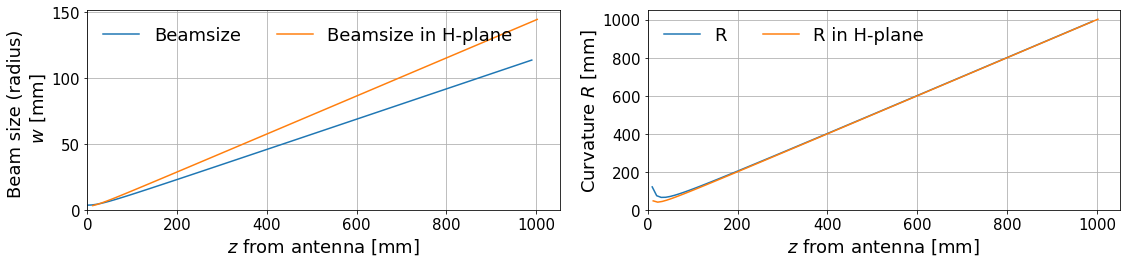

In [76]:
_dz = 10*mm
z_antenna_list = np.arange(0*mm, 1, _dz)  # z position from reflection
beamsize_antenna_list = calc_beamwaist(z=z_antenna_list, w0=w0, wavelength=wavelength)
R_antenna_list = calc_R(z=z_antenna_list, w0=w0, wavelength=wavelength)
zH_antenna_list = np.arange(0*mm, 1, _dz) - L_waist + L_waistH  # z position from reflection
beamsizeH_antenna_list = calc_beamwaist(z=zH_antenna_list, w0=w0H, wavelength=wavelength)
RH_antenna_list = calc_R(z=zH_antenna_list, w0=w0H, wavelength=wavelength)
print(f'z_antenna_list        = {z_antenna_list/mm} mm')
print(f'beamsize_antenna_list = {beamsize_antenna_list/mm} mm')
print(f'R_antenna_list        = {R_antenna_list/mm} mm')

fig, ax = plt.subplots(1, 2, figsize=(16,4))
_ax = ax[0]
_ax.plot(z_antenna_list/mm, beamsize_antenna_list/mm, label='Beamsize')
_ax.plot(zH_antenna_list/mm, beamsizeH_antenna_list/mm, label='Beamsize in H-plane')
_ax.set_xlabel('$z$ from antenna [mm]')
_ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
_ax.legend(frameon=False, ncol=2)
_ax.grid(True)
_ax.set_xlim(left=0)
_ax.set_ylim(bottom=0)
_ax = ax[1]
_ax.plot(z_antenna_list/mm, R_antenna_list/mm, label='R')
_ax.plot(zH_antenna_list/mm, RH_antenna_list/mm, label='R in H-plane')
_ax.set_xlabel('$z$ from antenna [mm]')
_ax.set_ylabel('Curvature $R$ [mm]')
_ax.legend(frameon=False, ncol=2)
_ax.grid(True)
_ax.set_xlim(left=0)
_ax.set_ylim(bottom=0)

fig.tight_layout()
#ax.set_xlim([0, 200])
#ax.set_ylim([0, 200])

## Beam after mirror

In [77]:
height_after_ref = 2*f_mirror / np.sin(slant_angle) * np.abs(np.cos(slant_angle) - 1.)
print(f'height after reflection = {height_after_ref/mm} mm')

height after reflection = 651.0799999999999 mm


In [78]:
z_mirror_list = np.arange(0*mm, 2000*mm+_dz, _dz)  # z position from reflection
beamsize_mirror_list = calc_beamwaist(z=z_mirror_list, w0=w_mirror, wavelength=wavelength)
beamsizeH_mirror_list = calc_beamwaist(z=z_mirror_list, w0=wH_mirror, wavelength=wavelength)
print(f'z_mirror_list (after mirror) = {z_mirror_list/mm} mm')
print(f'beamsize_mirror_list (after mirror) = {beamsize_mirror_list/mm} mm')

z_mirror_list (after mirror) = [   0.   10.   20. ... 1980. 1990. 2000.] mm
beamsize_mirror_list (after mirror) = [74.99957827 74.99960162 74.99967167 ... 75.90941269 75.91857038
 75.92777309] mm


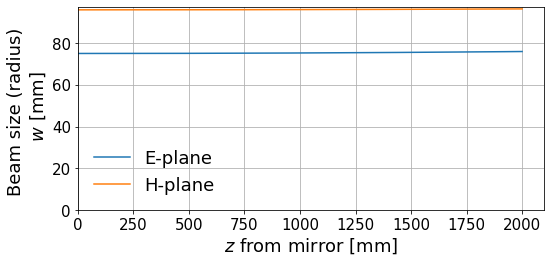

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(z_mirror_list/mm, beamsize_mirror_list/mm, label='E-plane')
ax.plot(z_mirror_list/mm, beamsizeH_mirror_list/mm, label='H-plane')
ax.set_xlabel('$z$ from mirror [mm]')
ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
ax.grid(True)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.legend(frameon=False)
fig.tight_layout()

## Beam for all path

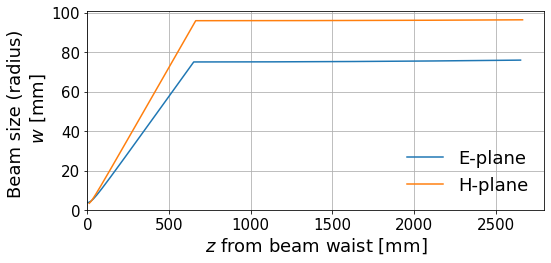

In [84]:
# E-plane
z_mirror_list_from_antenna = z_mirror_list + z_mirror
i_before_mirror = np.where( z_antenna_list < z_mirror)
z_list = np.hstack([z_antenna_list[i_before_mirror], z_mirror_list_from_antenna])
beamsize_list = np.hstack([beamsize_antenna_list[i_before_mirror], beamsize_mirror_list])
# H-plane
zH_mirror_list_from_antenna = z_mirror_list + zH_mirror
i_before_mirrorH = np.where( zH_antenna_list < zH_mirror)
zH_list = np.hstack([zH_antenna_list[i_before_mirrorH], zH_mirror_list_from_antenna])
beamsizeH_list = np.hstack([beamsizeH_antenna_list[i_before_mirrorH], beamsizeH_mirror_list])

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(z_list/mm, beamsize_list/mm, label='E-plane')
ax.plot(zH_list/mm, beamsizeH_list/mm, label='H-plane')
ax.set_xlabel('$z$ from beam waist [mm]')
ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
ax.grid(True)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.legend(frameon=False)
fig.tight_layout()

# Plot CST data

## Functions

## v7-1 (for 2D inputs at U=0)

In [88]:
_indir = 'input/CST/215GHz_v7-1/HS1_uni'
_infile = 'E-field_abs_ave_w-v.txt'
_w_list_mm = np.array([100, 200, 300, 400, 480])
_w_list= _w_list_mm * mm
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

print(_infile)
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)

E-field_abs_ave_w-v.txt
input file = input/CST/v7-1/HS1_uni/E-field_abs_ave_w-v.txt (type=3D_twovalue)


x_list (size=(501,)) = [  0.   1.   2. ... 498. 499. 500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
w = 100 mm
w = 200 mm
w = 300 mm
w = 400 mm
w = 480 mm


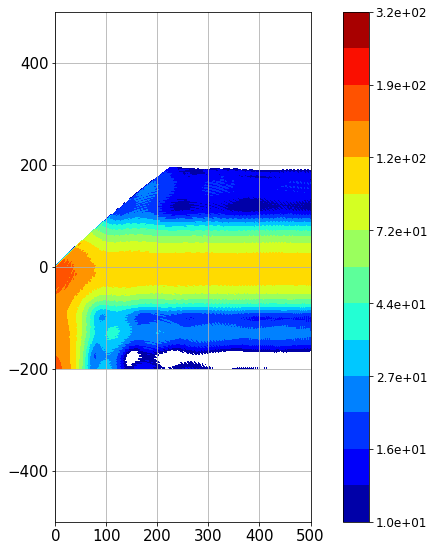

In [89]:
### Create slice data list ###
_slicedata_list = []
_newgrid = ( np.linspace(0, 500, 500+1), np.linspace(-500, 500, 500+1) )
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['z', 'y', 'val0'], logz=True, 
                     levels=np.power(10., np.linspace(10, 25, 15)/10), 
                     newgrid=_newgrid)
_data_grid['val0'] = _data_grid.pop('z') # key name change: z --> val0
_data_grid['val0'][np.isnan(_data_grid['val0'])] = 0.

for _w in _w_list_mm:
    print(f'w = {_w} mm')
    _slicedata_list.append( getSlice(_data_grid, 'x', _w) )
    pass

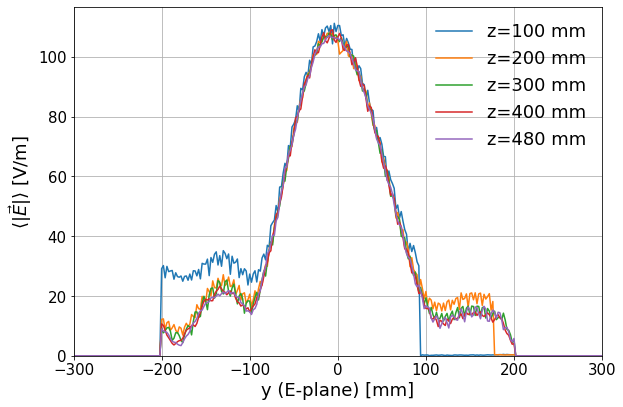

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))
for _label, _data in zip(_label_list, _slicedata_list):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-300, 300])
ax.set_ylim(bottom=0)
#ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

x @ y max = -4.0
Beam size @ power = 1/e = 77.18 mm / 78.00 mm
x @ y max = -6.0
Beam size @ power = 1/e = 75.20 mm / 76.15 mm
x @ y max = -10.0
Beam size @ power = 1/e = 74.14 mm / 75.89 mm
x @ y max = -6.0
Beam size @ power = 1/e = 74.71 mm / 76.09 mm
x @ y max = -10.0
Beam size @ power = 1/e = 74.47 mm / 76.06 mm


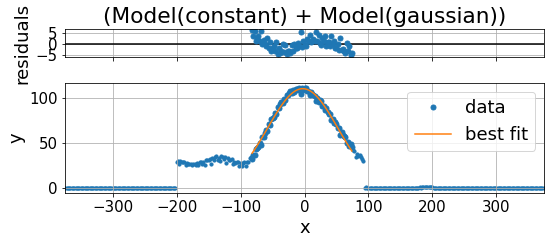

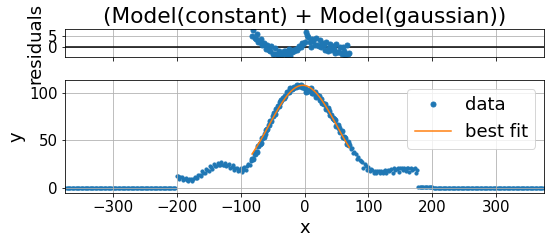

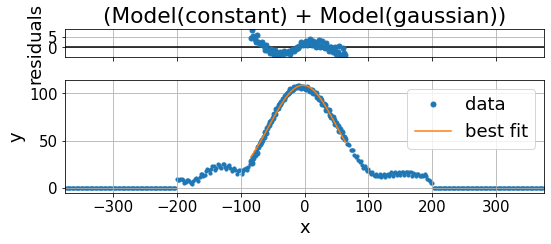

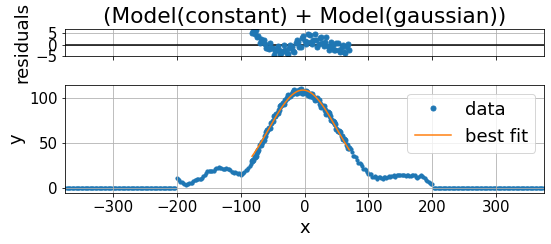

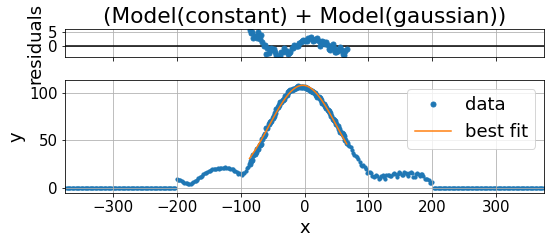

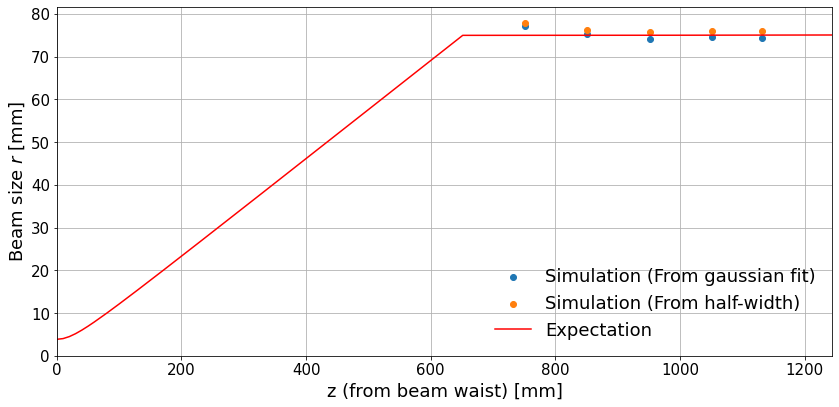

In [91]:
### Calculate beam size ###
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 10
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x_ave = np.convolve(_x, _b, mode="same") 
    _y_ave = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x_ave, _y_ave) )
    _beamsize2_list.append( _fwhm_from_half*mm )
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _range_scale = 1.0
    #_range_scale = 0.5
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*_range_scale, _x_ymax+_fwhm_from_half*_range_scale], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value )*mm )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]/mm:.2f} mm / {_beamsize2_list[-1]/mm:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

### Draw beam size ###

# Temporary Expectation
#_z_tmp_list = z_antenna_list
#_beamsize_tmp_list = calc_beamwaist(z=_z_tmp_list+20*mm, w0=w0*1.0, wavelength=wavelength)
# Simulation
_z_list = _w_list + z_mirror

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation (From gaussian fit)')
ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
ax.plot(z_list/mm, beamsize_list/mm, label='Expectation', c='red')
#ax.plot(_z_tmp_list/mm, _beamsize_tmp_list/mm, label='Expectation (tmp)')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm)*1.1)
#ax.set_ylim(bottom=0, top=max(_beamsize_list/mm)*1.1)
ax.set_ylim(bottom=0)
#ax.set_yscale('log')
ax.legend(frameon=False, loc='lower right')
fig.tight_layout()

In [94]:
### Save the data ###
data_71 = {'slicedata_list':_slicedata_list, 
           'z_list':_z_list, 'w_list':_w_list, 
           'beamsize_list':_beamsize_list, 'fitresult_list':_fitresult_list}

## Circular Antenna v7-1 (E-plane)
- 215 GHz
- SP2: Antenna Only < 200 mm
- (U, V, W)
- V: optical axis
- W: E-plane (E direction)

In [95]:
_indir = 'input/CST/215GHz_v7-1/SP2/'
_infile = 'E-field_abs_ave_w-v.txt'
_w_list_mm = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
_w_list= _w_list_mm * mm
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

print(_infile)
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)

E-field_abs_ave_w-v.txt
input file = input/CST/v7-1/SP2//E-field_abs_ave_w-v.txt (type=3D_twovalue)


x_list (size=(3001,)) = [0.000e+00 1.000e-01 2.000e-01 ... 2.998e+02 2.999e+02 3.000e+02]
y_list (size=(2001,)) = [-100.   -99.9  -99.8 ...   99.8   99.9  100. ]
w = 0 mm
w = 20 mm
w = 40 mm
w = 60 mm
w = 80 mm
w = 100 mm
w = 120 mm
w = 140 mm
w = 160 mm
w = 180 mm
w = 200 mm


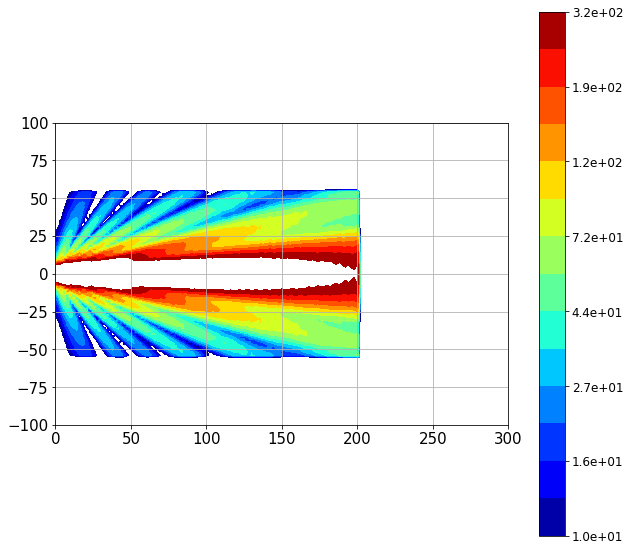

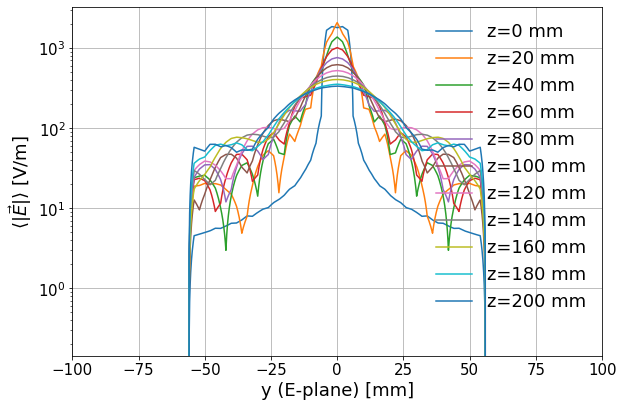

In [96]:
### Create slice data list ###
_slicedata_list = []
_newgrid = ( np.linspace(0, 300, 3000+1), np.linspace(-100, 100, 2000+1) )
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['y', 'z', 'val0'], logz=True, 
                     levels=np.power(10., np.linspace(10, 25, 15)/10), 
                     newgrid=_newgrid)
_data_grid['val0'] = _data_grid.pop('z') # key name change: z --> val0
_data_grid['val0'][np.isnan(_data_grid['val0'])] = 0.

for _w in _w_list_mm:
    print(f'w = {_w} mm')
    _slicedata_list.append( getSlice(_data_grid, 'x', _w) )
    pass

fig, ax = plt.subplots(1, 1, figsize=(9,6))
for _label, _data in zip(_label_list, _slicedata_list):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-100, 100])
#ax.set_ylim(bottom=0)
ax.set_yscale('log')
#ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

x @ y max = -2.0
Beam size @ power = 1/e = 5.74 mm / 5.97 mm
x @ y max = 0.0
Beam size @ power = 1/e = 5.70 mm / 5.39 mm
x @ y max = 0.0
Beam size @ power = 1/e = 5.80 mm / 5.71 mm
x @ y max = 0.0
Beam size @ power = 1/e = 7.92 mm / 7.87 mm
x @ y max = 0.0
Beam size @ power = 1/e = 10.26 mm / 10.22 mm
x @ y max = 0.0
Beam size @ power = 1/e = 12.68 mm / 12.68 mm
x @ y max = 0.0
Beam size @ power = 1/e = 15.17 mm / 15.14 mm
x @ y max = 0.0
Beam size @ power = 1/e = 17.63 mm / 17.64 mm
x @ y max = 0.0
Beam size @ power = 1/e = 20.04 mm / 20.12 mm
x @ y max = 0.0
Beam size @ power = 1/e = 22.40 mm / 22.27 mm
x @ y max = 0.0
Beam size @ power = 1/e = 24.94 mm / 24.73 mm


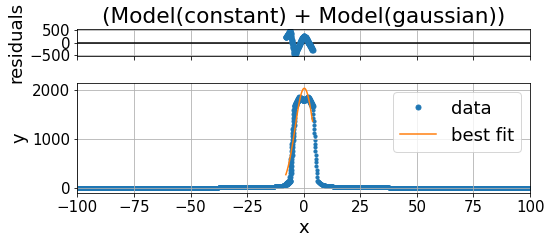

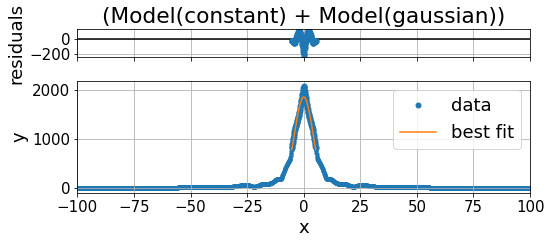

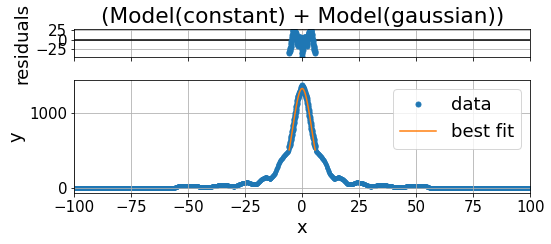

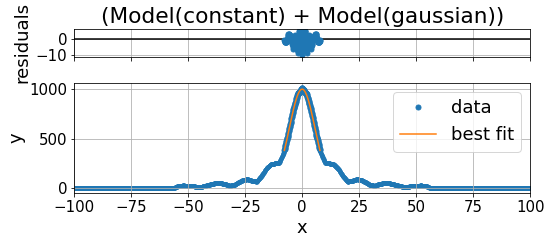

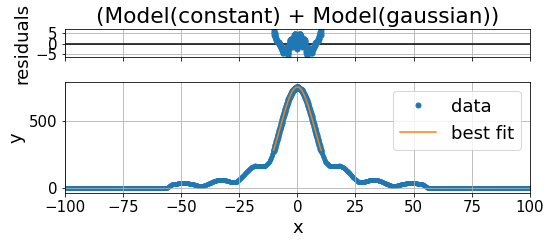

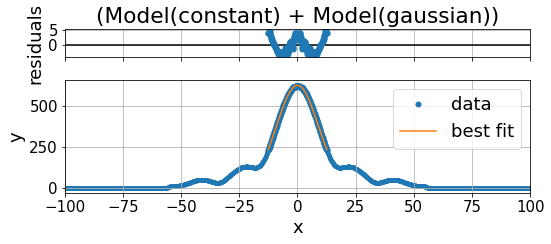

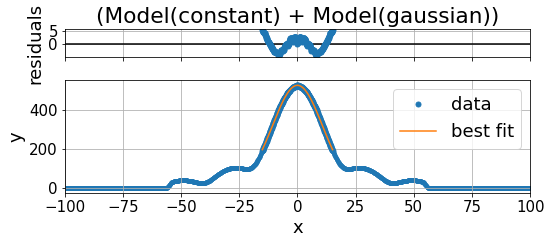

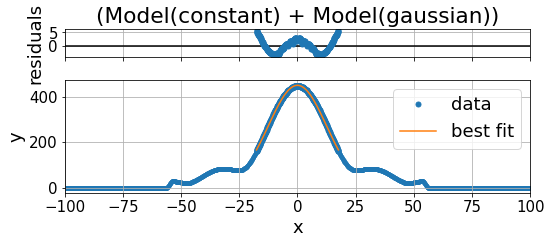

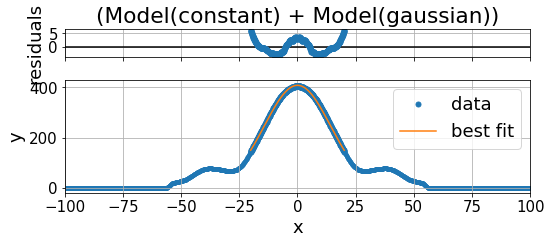

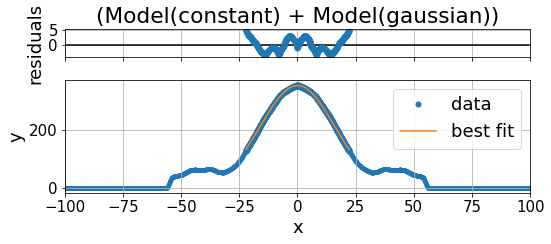

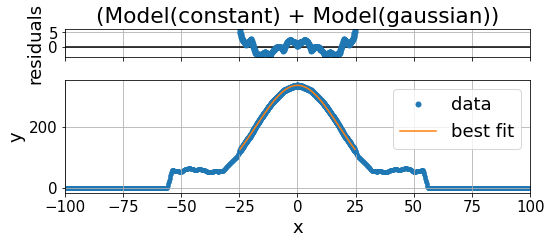

In [97]:
### Calculate beam size ###
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 1
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x_ave = np.convolve(_x, _b, mode="same") 
    _y_ave = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x_ave, _y_ave) )
    _beamsize2_list.append( _fwhm_from_half*mm )
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _range_scale = 1.0
    #_range_scale = 0.5
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*_range_scale, _x_ymax+_fwhm_from_half*_range_scale], 
                        xlim=[-100, 100])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value )*mm )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]/mm:.2f} mm / {_beamsize2_list[-1]/mm:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

beam waist = 3.8597916056636232 mm
L waist = 51.63 mm


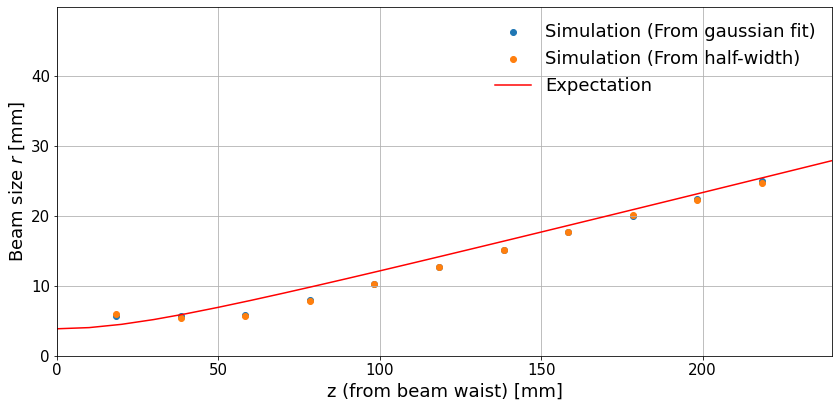

In [98]:
# Simulation
_z_list = _w_list + d_waist

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation (From gaussian fit)')
ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
ax.plot(z_antenna_list/mm, beamsize_antenna_list/mm, label='Expectation', c='red')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm)*1.1)
ax.set_ylim(bottom=0, top=max(_beamsize_list/mm)*2)
#ax.set_yscale('log')
ax.legend(frameon=False)
fig.tight_layout()

print(f'beam waist = {w0/mm} mm')
print(f'L waist = {L_waist/mm} mm')

In [99]:
### Save the data ###
data_71Antenna = {'slicedata_list':_slicedata_list, 
                  'z_list':_z_list, 'w_list':_w_list, 
                  'beamsize_list':_beamsize_list, 'fitresult_list':_fitresult_list}

w0 = 8.00026775528409 +- 0.6665917257094554 mm
z0 = -55.21671435990122 +- 8.167667306199435 mm
redchi = 3.610841606567655e-06
success = True
w0 = 7.999591709474557 +- 0.680932531216937 mm
z0 = -55.581946358980815 +- 8.319207822473803 mm
redchi = 3.7558561112050566e-06
success = True


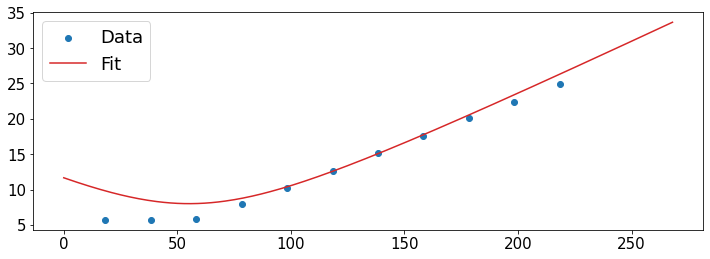

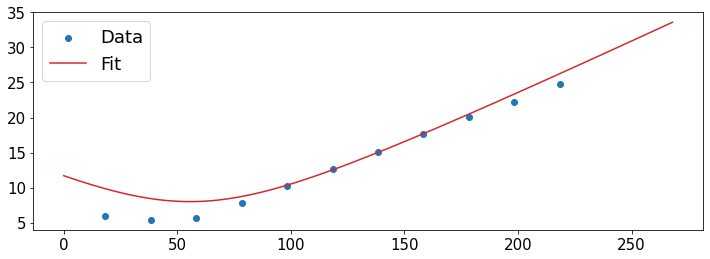

In [100]:
fit_beamsize(_z_list, _beamsize_list, w0)
fit_beamsize(_z_list, _beamsize2_list, w0)

## Circular Antenna v7-1 (H-plane)
- 215 GHz
- SP2: Antenna Only < 200 mm
- (U, V, W)
- V: optical axis
- W: E-plane (E direction)

In [101]:
_indir = 'input/CST/215GHz_v7-1/SP2/'
_infile = 'E-field_abs_ave_u-v.txt'
_w_list_mm = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
_w_list= _w_list_mm * mm
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

print(_infile)
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)

E-field_abs_ave_u-v.txt
input file = input/CST/v7-1/SP2//E-field_abs_ave_u-v.txt (type=3D_twovalue)


x_list (size=(3001,)) = [0.000e+00 1.000e-01 2.000e-01 ... 2.998e+02 2.999e+02 3.000e+02]
y_list (size=(2001,)) = [-100.   -99.9  -99.8 ...   99.8   99.9  100. ]
w = 0 mm
w = 20 mm
w = 40 mm
w = 60 mm
w = 80 mm
w = 100 mm
w = 120 mm
w = 140 mm
w = 160 mm
w = 180 mm
w = 200 mm


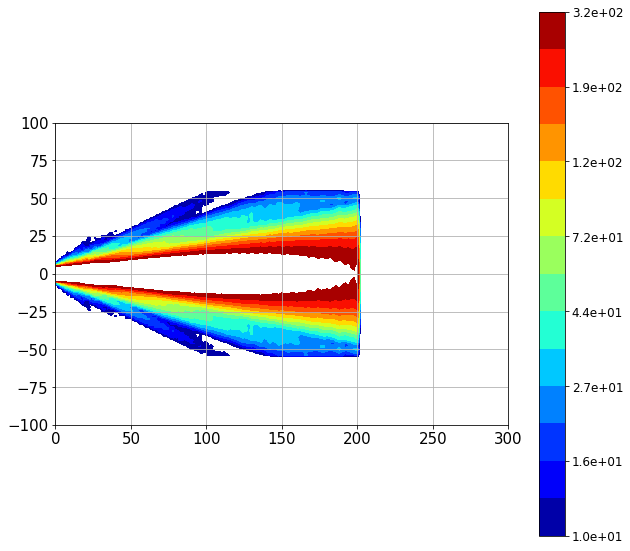

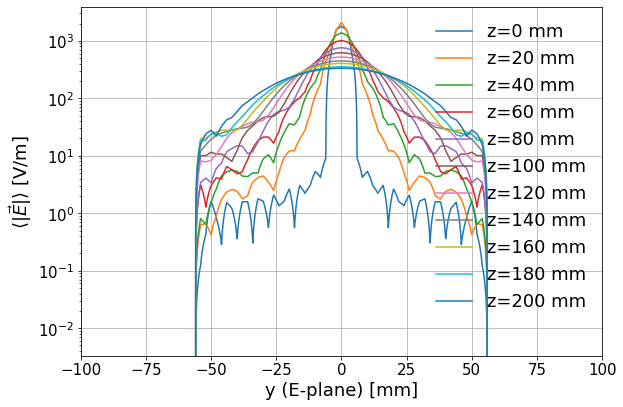

In [102]:
### Create slice data list ###
_slicedata_list = []
_newgrid = ( np.linspace(0, 300, 3000+1), np.linspace(-100, 100, 2000+1) )
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['y', 'x', 'val0'], logz=True, 
                     levels=np.power(10., np.linspace(10, 25, 15)/10), 
                     newgrid=_newgrid)
_data_grid['val0'] = _data_grid.pop('z') # key name change: z --> val0
_data_grid['val0'][np.isnan(_data_grid['val0'])] = 0.

for _w in _w_list_mm:
    print(f'w = {_w} mm')
    _slicedata_list.append( getSlice(_data_grid, 'x', _w) )
    pass

fig, ax = plt.subplots(1, 1, figsize=(9,6))
for _label, _data in zip(_label_list, _slicedata_list):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-100, 100])
#ax.set_ylim(bottom=0)
ax.set_yscale('log')
#ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

x @ y max = 0.0
Beam size @ power = 1/e = 4.07 mm / 4.02 mm
x @ y max = 0.0
Beam size @ power = 1/e = 4.05 mm / 3.90 mm
x @ y max = 0.0
Beam size @ power = 1/e = 6.65 mm / 6.57 mm
x @ y max = 0.0
Beam size @ power = 1/e = 9.71 mm / 9.65 mm
x @ y max = 0.0
Beam size @ power = 1/e = 12.85 mm / 12.81 mm
x @ y max = 0.0
Beam size @ power = 1/e = 16.08 mm / 16.09 mm
x @ y max = 0.0
Beam size @ power = 1/e = 19.34 mm / 19.33 mm
x @ y max = 0.0
Beam size @ power = 1/e = 22.35 mm / 22.42 mm
x @ y max = 0.0
Beam size @ power = 1/e = 25.52 mm / 25.56 mm
x @ y max = 0.0
Beam size @ power = 1/e = 28.64 mm / 28.68 mm
x @ y max = 0.0
Beam size @ power = 1/e = 31.99 mm / 31.97 mm


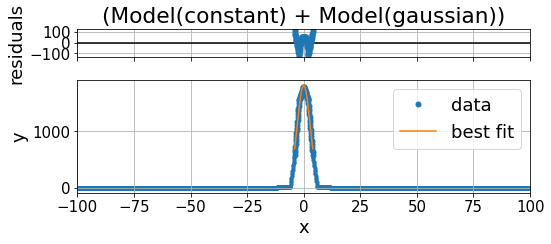

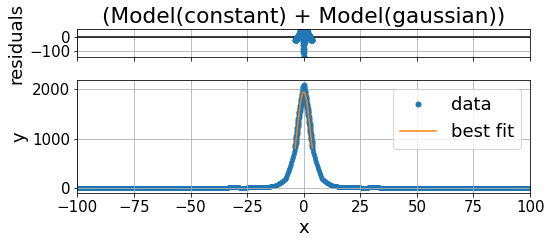

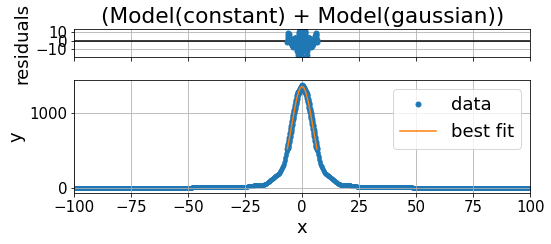

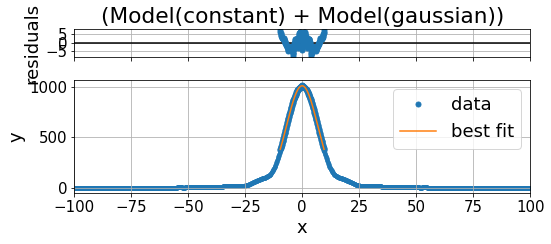

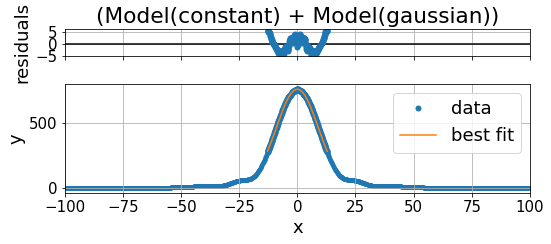

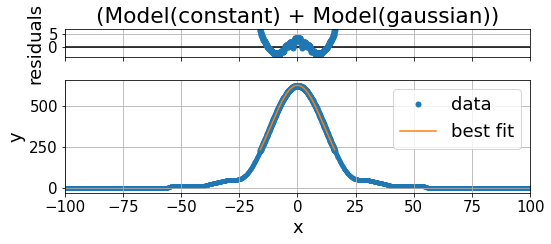

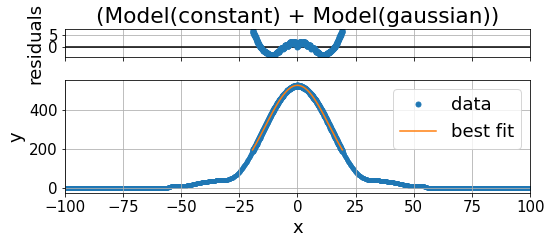

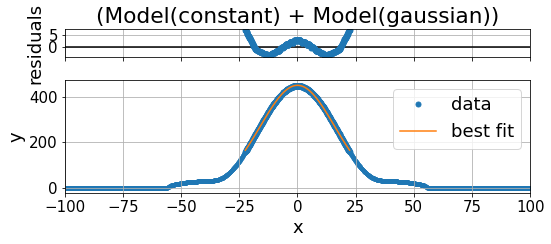

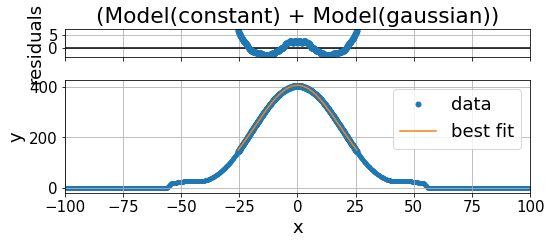

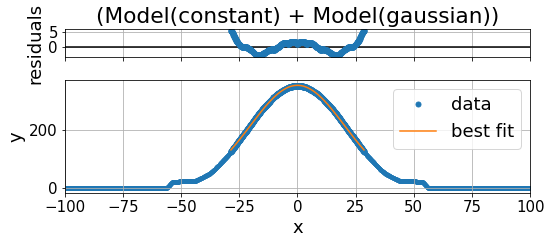

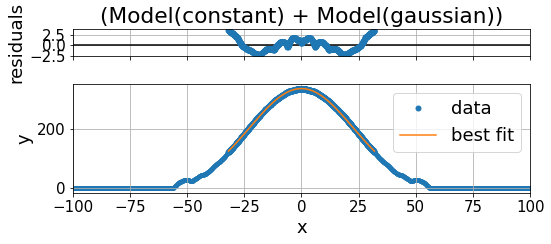

In [103]:
### Calculate beam size ###
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 1
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x_ave = np.convolve(_x, _b, mode="same") 
    _y_ave = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x_ave, _y_ave) )
    _beamsize2_list.append( _fwhm_from_half*mm )
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _range_scale = 1.0
    #_range_scale = 0.5
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*_range_scale, _x_ymax+_fwhm_from_half*_range_scale], 
                        xlim=[-100, 100])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value )*mm )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]/mm:.2f} mm / {_beamsize2_list[-1]/mm:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

beam waist = 3.8597916056636232 mm
L waist = 51.63 mm


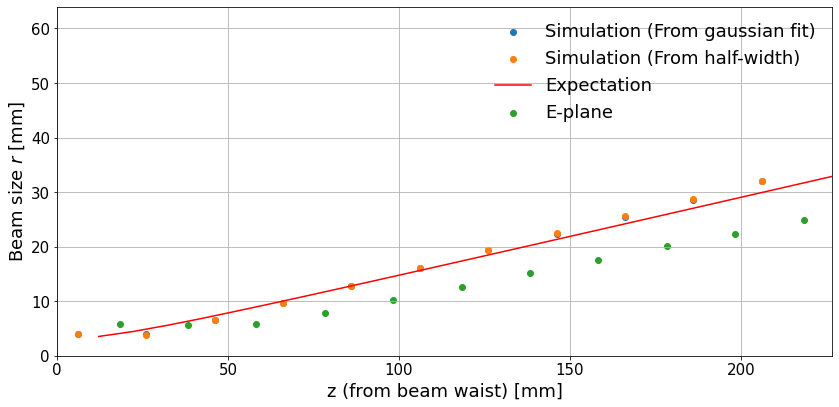

In [107]:
# Simulation
_z_list = _w_list + d_waistH

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation (From gaussian fit)')
ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
ax.plot(zH_antenna_list/mm, beamsizeH_antenna_list/mm, label='Expectation', c='red')
ax.scatter(data_71Antenna['z_list']/mm, data_71Antenna['beamsize_list']/mm, label='E-plane')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm)*1.1)
ax.set_ylim(bottom=0, top=max(_beamsize_list/mm)*2)
#ax.set_yscale('log')
ax.legend(frameon=False)
fig.tight_layout()

print(f'beam waist = {w0/mm} mm')
print(f'L waist = {L_waist/mm} mm')

In [108]:
### Save the data ###
data_71HAntenna = {'slicedata_list':_slicedata_list, 
                  'z_list':_z_list, 'w_list':_w_list, 
                  'beamsize_list':_beamsize_list, 'fitresult_list':_fitresult_list}

w0 = 6.894473685556102 +- 0.40913103481908614 mm
z0 = -26.41549116725382 +- 6.635610535080825 mm
redchi = 2.711489195870129e-06
success = True
w0 = 6.874882423885619 +- 0.4189718300092686 mm
z0 = -26.620544524996443 +- 6.805531282298036 mm
redchi = 2.8679344120157696e-06
success = True


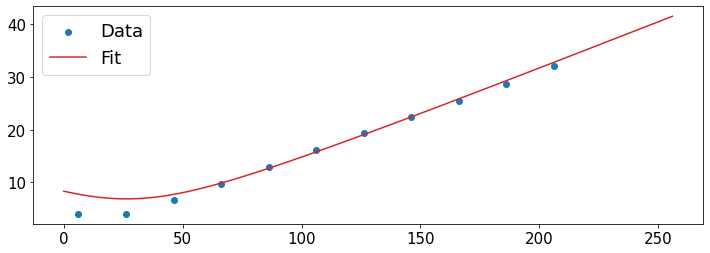

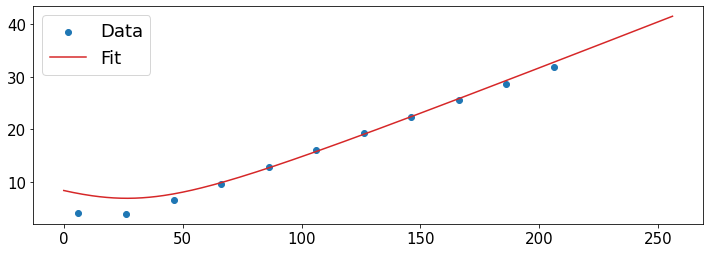

In [109]:
fit_beamsize(_z_list, _beamsize_list, w0)
fit_beamsize(_z_list, _beamsize2_list, w0)

# The End

# Obsolete scripts

### Phase check (E-field u-component) (Old)

input file = input/CST/v4-1HS2//E-field_u_phase_w200.txt (type=3D_twovalue)
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
input file = input/CST/v4-1HS2//E-field_u_phase_w500.txt (type=3D_twovalue)
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]


Text(0.5, 0.98, 'z from mirror = 500 mm')

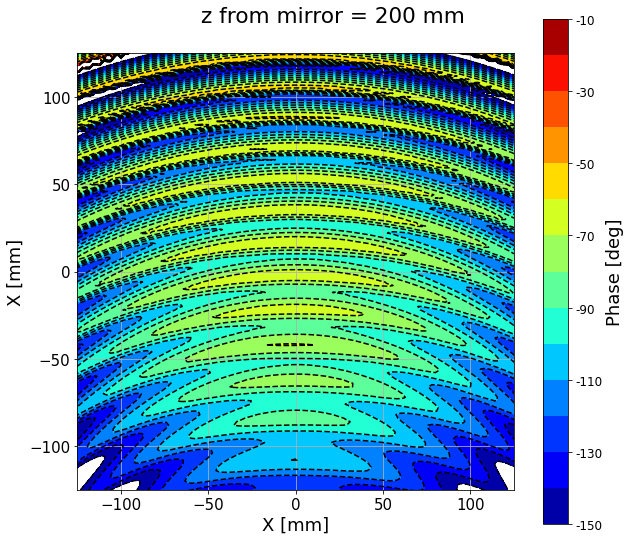

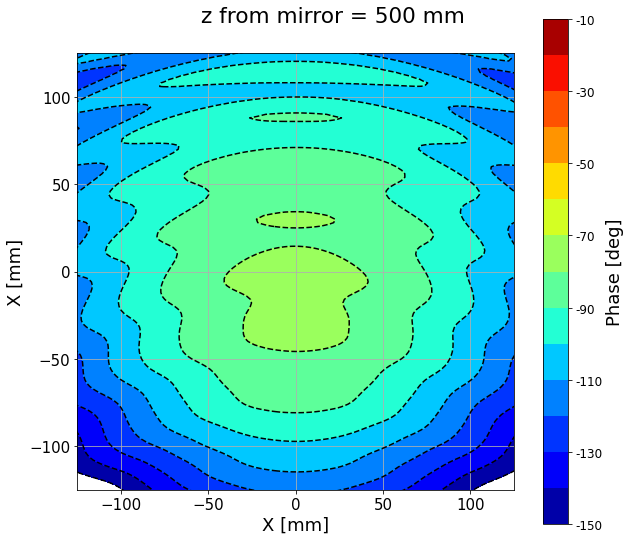

In [51]:
#_contourtype = None
#_levels = np.arange(-180, 180, 30)

#_contourtype = 'line'
_contourtype = 'fill-line'
_levels = np.arange(-150, 0, 10)

_indir = 'input/CST/v4-1HS2/'
_infile = 'E-field_u_phase_w200.txt'
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['x', 'y', 'val0'], logz=False,
                                 contourtype=_contourtype, levels = _levels, colorbarFormat='%.0f',
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel='Phase [deg]')
ax.set_xlim([-125, 125])
ax.set_ylim([-125, 125])
fig.suptitle('z from mirror = 200 mm')
_infile = 'E-field_u_phase_w500.txt'
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['x', 'y', 'val0'], logz=False,
                                 contourtype=_contourtype, levels = _levels, colorbarFormat='%.0f',
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel='Phase [deg]')
ax.set_xlim([-125, 125])
ax.set_ylim([-125, 125])
fig.suptitle('z from mirror = 500 mm')

input file = input/CST/v4-1HS2//E-field_v_phase_w200.txt (type=3D_twovalue)
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]


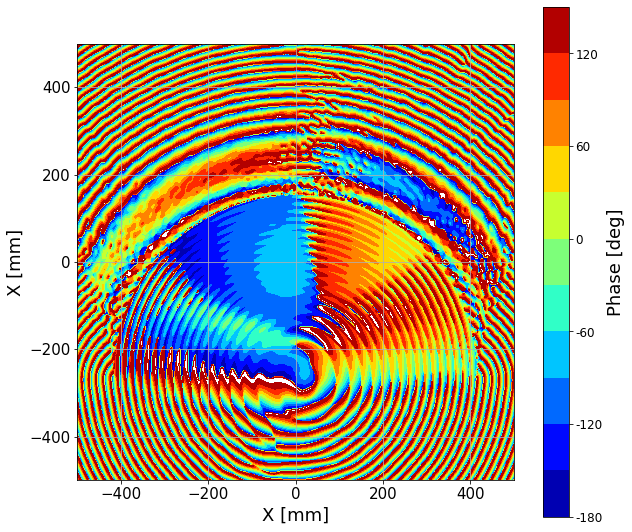

In [52]:
_indir = 'input/CST/v4-1HS2/'
_infile = 'E-field_v_phase_w200.txt'
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['x', 'y', 'val0'], logz=False,
                                 levels = np.arange(-180, 180, 30), colorbarFormat='%.0f',
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel='Phase [deg]')

### Z/Abs check (E-field $|E_w| / |E|$) (Old)

In [ ]:
_levels = np.arange(0, 150, 10)

_indir = 'input/CST/v4-1HS2/'
_infile = 'E-field_w_mag_w500.txt'
_raw_data1 = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)
fig, ax, _data_grid = plot2D_key(_raw_data1, keys=['x', 'y', 'val0'], logz=False,
                                 levels = _levels,
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel=r'$|E_z|$ [V/m]')
fig.suptitle(r'z component $|E_z|$')


_indir = 'input/CST/v4-1HS2/'
_infile = 'E-field_abs_mag_w500.txt'
_raw_data2 = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)
fig, ax, _data_grid = plot2D_key(_raw_data2, keys=['x', 'y', 'val0'], logz=False,
                                 levels = _levels,
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel=r'$|E|$ [V/m]')
fig.suptitle(r'Absolute component $|E|$')

_data_ratio = _raw_data1
_data_ratio['val0'] = _data_ratio['val0'] / _raw_data2['val0']
fig, ax, _data_grid = plot2D_key(_data_ratio, keys=['x', 'y', 'val0'], logz=False,
                                 levels = np.arange(0, 0.2, 0.01),
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel=r'$|E_z|/|E|$')
fig.suptitle(r'$|E_z| / |E|$')
ax.set_xlim(-125, 125)
ax.set_ylim(-125, 125)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
for i, (_data, _label) in enumerate(zip(_datalist, _labels)):
    _x = _data['angle']
    _y = _data['val']
    _x, tmp = func.average_list(_x, 10)
    _y, tmp = func.average_list(_y, 10)
    #sc = ax[0].scatter(_x, _y, label=_label, s=10)
    sc = ax[0].plot(_x, _y, label=_label, lw=2)
    if i == 0:
        _y0 = _y
    else:
        #ax[1].scatter( _x, np.divide(_y, _y0), c=sc.get_ec(), s=10 )
        ax[1].plot( _x, np.divide(_y, _y0), c=sc[0].get_c(), lw=2 )
        pass
    pass
ax[0].legend(frameon=False)
ax[0].grid(True)
ax[1].grid(True)
ax[1].plot([-180,180],[1,1],c='k',lw=1)

ax[0].set_xlim(-90, 90)
ax[1].set_xlim(-90, 90)
fig.tight_layout()